In [1]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
!pip install -U spacy

In [31]:
import spacy

In [32]:
nlp = spacy.load('en_core_web_sm')

In [33]:
doc = nlp(u'Corona will go very soon. Do not get panic, maintain social distancing and follow the instructions. Cases in U.S. have reduced in last 48 hours')

In [7]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Corona PROPN nsubj
will AUX aux
go VERB ROOT
very ADV advmod
soon ADV advmod
. PUNCT punct
Do AUX aux
not PART neg
get VERB ROOT
panic NOUN dobj
, PUNCT punct
maintain VERB conj
social ADJ amod
distancing NOUN dobj
and CCONJ cc
follow VERB conj
the DET det
instructions NOUN dobj
. PUNCT punct
Cases NOUN nsubj
in ADP prep
U.S. PROPN pobj
have AUX aux
reduced VERB ROOT
in ADP prep
last ADJ amod
48 NUM nummod
hours NOUN pobj


In [8]:
doc = nlp(u'im trying so hard now')

In [9]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

i PRON nsubj
m AUX aux
trying VERB ROOT
so ADV advmod
hard ADV advmod
now ADV advmod


In [1]:
pip install transformers

You should consider upgrading via the 'C:\Users\HP\Desktop\Spacy\spacy-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [36]:
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp("the project is in progress but time is fast")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
project ... nsubj
is ... ROOT
in ... prep
progress ... pobj
but ... cc
time ... nsubj
is ... conj
fast ... acomp


In [37]:
doc = nlp("knowledge graphs project is still on going.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

knowledge ... compound
graphs ... compound
project ... nsubj
is ... ROOT
still ... advmod
on ... prep
going ... pcomp
. ... punct


In [7]:
!pip install pandas

In [8]:

nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [9]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

ModuleNotFoundError: No module named 'pandas'

In [10]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

In [2]:
pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=8373609186f124203e55317759317bd14860b10753ace7f448f85feaa9f21d27
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:

nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [5]:
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [109]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

In [110]:
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [111]:
candidate_sentences = pd.read_csv("transcript.csv")
candidate_sentences.shape

(1, 1)

In [112]:
candidate_sentences['transcript'].sample(1)

0    the girl is garded by a dog
Name: transcript, dtype: object

In [113]:
doc = nlp("the girl has a dog")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
girl ... nsubj
has ... ROOT
a ... det
dog ... dobj


In [149]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

    
  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
    
        
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""     
     

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = tok.text
    
        
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_dep = tok.dep_
  #############################################################

  return ent1.strip(), ent2.strip()

In [150]:
get_entities("the girl has a nice cute dog")

('girl', 'dog')

In [151]:
entity_pairs = []

for i in tqdm(candidate_sentences["transcript"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1/1 [00:00<00:00, 71.61it/s]


In [152]:
entity_pairs

[('girl', 'dog')]

In [153]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [154]:
get_relation("the nice brown girl is garded by a dog and a cat")

'garded by'

In [155]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['transcript'])]

100%|██████████| 1/1 [00:00<00:00, 91.20it/s]


In [156]:
pd.Series(relations).value_counts()

garded by    1
dtype: int64

In [157]:
print("the entities are: ", entity_pairs, "and the relation is: ", get_relation(i))

the entities are:  [('girl', 'dog')] and the relation is:  garded by


In [158]:
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [159]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


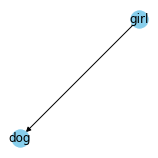

In [125]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

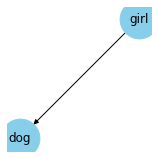

In [126]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="garded by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(2,2))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()